In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import HTML
from matplotlib import animation

In [2]:
def anima_newton(f, f_, xlim, ylim, x0, max_iter, interval=700):
    
    ft = lambda x, xi: f(xi) + f_(xi)*(x - xi)
    newton = lambda xi: xi - f(xi) / f_(xi)
    
    x = np.linspace(xlim[0], xlim[1], 100)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_ylim(ylim)
    
    _, = ax.plot(x, f(x))
    _, = ax.plot(x, np.zeros_like(x))
    line, = ax.plot([], [])
    
    x_is = []
    x_is.append(x0)
    
    x_i = None
    x_i_1 = x_is[-1]
    
    while x_i != x_i_1 and len(x_is) < max_iter:
        
        x_i = x_i_1
        x_i_1 = newton(x_i)
        x_is.append(x_i_1)
        
    print("Convergiu em {} iterações".format(len(x_is)))
        
    def init():
        
        return (line,)
    
    def animate(i):
        
        x_i = x_is[i]
        x_i_1 = x_is[i + 1]
        # plota tangente
        xt = np.linspace(x_i, x_i_1, 20)
        yt = ft(xt, x_i)
        
        line.set_data(xt, yt)

        return (line,)
    
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x_is) - 1, interval = interval)
    
    return anim

Convergiu em 8 iterações


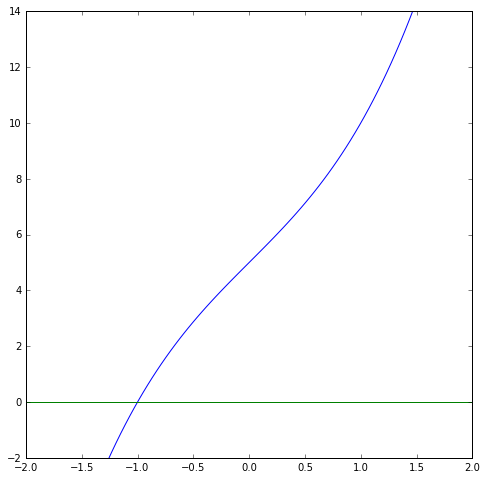

In [3]:
f = lambda x: x**3 + 4*x + 5
f_ = lambda x: 3*x**2 + 4

anim = anima_newton(f, f_, (-2, 2), (-2, 14), 1.5, 100)

HTML(anim.to_html5_video())

Convergiu em 7 iterações


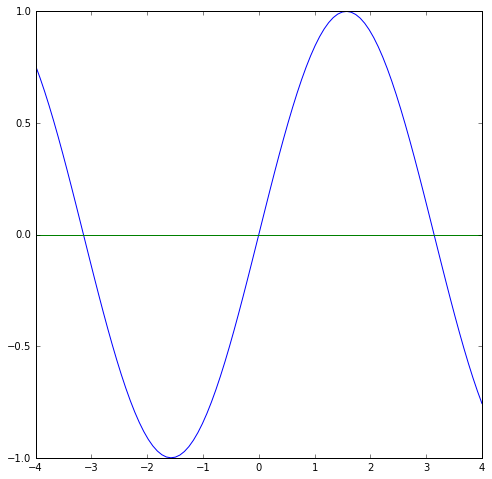

In [4]:
f = lambda x: np.sin(x)
f_ = lambda x: np.cos(x)

anim = anima_newton(f, f_, (-4, 4), (-1, 1), -1.3, 100)
HTML(anim.to_html5_video())

Convergiu em 18 iterações


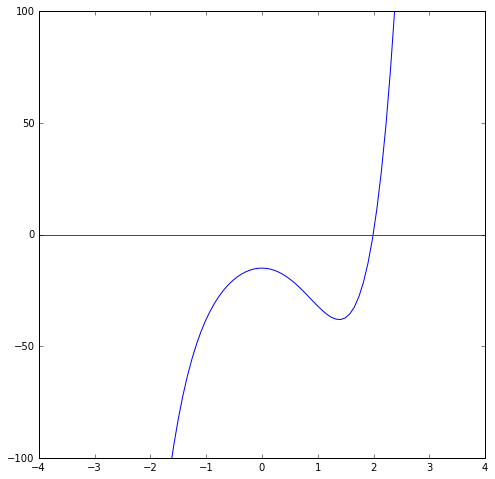

In [5]:
f = lambda x: 3*x**5 - 20*x**2 - 15
f_ = lambda x: 15*x**4 - 40*x

anim = anima_newton(f, f_, (-4, 4), (-100, 100), -1.3, 100)
HTML(anim.to_html5_video())

Convergiu em 100 iterações


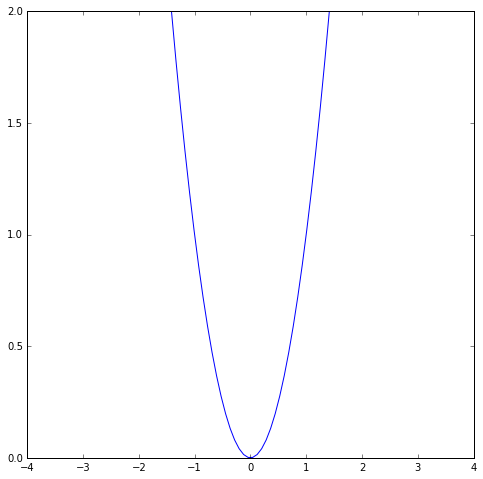

In [6]:
f = lambda x: x**2
f_ = lambda x: 2*x

anim = anima_newton(f, f_, (-4, 4), (0, 2), -1.3, 100)
HTML(anim.to_html5_video())